# Screencast

In this Notebook I´ll be working on the question if theres a difference in income of male/female developers.
The stackoverflow Data from 2020 is used.

First I'll read in the necessary libraries for data wrangling and building plots. Moreover I´ll read in the csv file and hava a first look at the data in the dataset.

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('/Users/anna/Downloads/developer_survey_2020/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


My first question of interest is "How much do female and male developer earn". Looking at the dataset there are several compensation Columns. in this case, I´ll use the ConvertedComp Column (Salary converted to annual USD salaries using the exchange rate on 2020–02–19, assuming 12 working months and 50 working weeks) because data is more comparable. Moreover I´m only interested in peolpe that work as professional developer and who belong to gender "male" oder "female" or in here "Man" or "Woman"

In [2]:
# Filtering the dataset, to only get professional developers that 
# belong to the Gender 'male' or 'female'

df=pd.DataFrame(df.query("MainBranch == 'I am a developer by profession' and (Gender=='Man' or Gender=='Woman')"))


In [3]:
# Checking my column of interest, the ConvertedComp Column,
# for missing values.

df.ConvertedComp.isna().mean()


0.2223090184247387

In [6]:
# Dropping the missing values in the ConvertedComp Column, because
# imputing with e.g. mean wouldn`t change the result and doesn`t lead to
# an improved answer 

df=df.dropna(subset=['ConvertedComp'])
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,11,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2
11,12,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,...,Easy,Appropriate in length,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,7
13,14,I am a developer by profession,Yes,27.0,13,Yearly,66000.0,66000.0,United States,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Vue.js,Angular;Vue.js,Just as welcome now as I felt last year,40.0,5,1


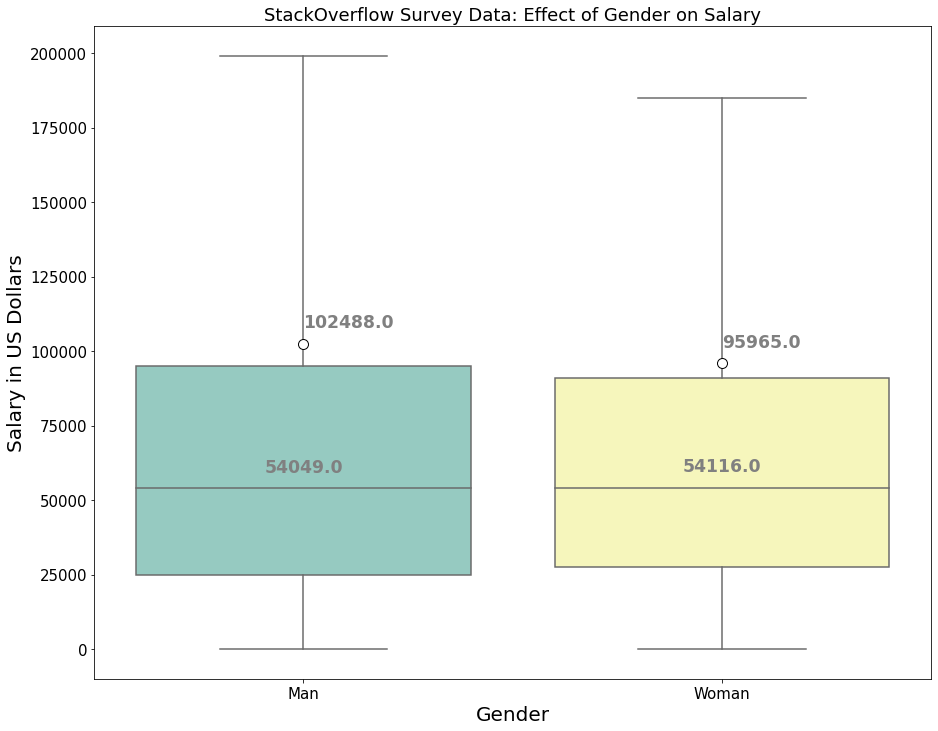

In [63]:
# Now, that the dataset is cleaned, I´ll plot the result. Therefor
# I use the seaborn library and make a boxplot to see the distribution
# of compensations

# Instantiate figure
plt.figure(figsize=(15,12))

# Generate boxplot of female and male salaries
# Specified color of the boxplot, hide outliers, 
# additionally show means with specified markers
box_plot = sns.boxplot(x="Gender", y="ConvertedComp" ,palette="Set3", data=df, orient='v',showfliers = False,  showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#calculate medians and means for each Gender group
medians = df.groupby(['Gender'])['ConvertedComp'].median()
means= round(df.groupby(['Gender'])['ConvertedComp'].mean())

# offset from median and mean for display
median_offset = df['ConvertedComp'].median() * 0.1 
mean_offset = df['ConvertedComp'].median() * 0.1

# costumize median and mean display in boxplot
for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + median_offset,medians[xtick], 
            horizontalalignment='center',size='xx-large',color='grey',weight='bold')
    box_plot.text(xtick,means[xtick] + mean_offset,means[xtick], 
            horizontalalignment='left',size='xx-large',color='grey',weight='bold')

# label axis and title
plt.ylabel("Salary in US Dollars", size=20)
plt.xlabel("Gender", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("StackOverflow Survey Data: Effect of Gender on Salary", size=18)

#save figure for use in blogpost
plt.savefig("Effect of Gender on Salary 2020.png")


In [ ]:
df_prof=pd.DataFrame(df.query("MainBranch == 'I am a developer by profession' and (Gender=='Man' or Gender=='Woman')"))
df_prof.shape

In [ ]:
plt.figure(figsize=(15,12))


box_plot = sns.boxplot(x="Gender", y="ConvertedComp", hue='EdLevel',palette="Set3", data=df, orient='v',showfliers = False,  showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
medians = df.groupby(['Gender'])['ConvertedComp'].median()
means= round(df.groupby(['Gender'])['ConvertedComp'].mean())
median_offset = df['ConvertedComp'].median() * 0.1 # offset from median for display
mean_offset = df['ConvertedComp'].median() * 0.1

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + median_offset,medians[xtick], 
            horizontalalignment='center',size='medium',color='grey',weight='bold')
    box_plot.text(xtick,means[xtick] + mean_offset,means[xtick], 
            horizontalalignment='left',size='medium',color='grey',weight='bold')
    
plt.ylabel("Salary in US Dollars", size=14)
plt.xlabel("Gender", size=14)
plt.title("StackOverflow Survey Data: Effect of Gender on Salary", size=18)

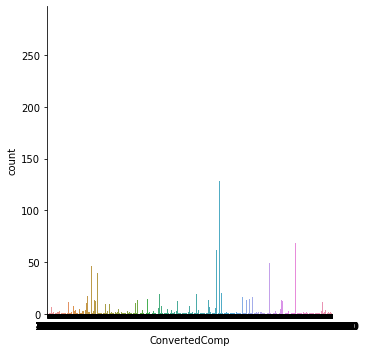

In [60]:
sns.catplot(x='ConvertedComp',data=df,kind='count')

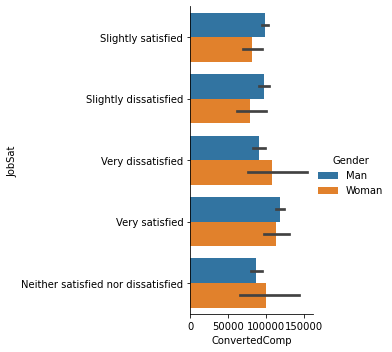

In [63]:
sns.catplot(x='ConvertedComp', y='JobSat',hue='Gender', kind='bar', data=df)